# Neural Network For Handwritten Digits Classification 
## Author : Laukit Mandal

**MNIST Handwritten Digit Classification**

In [258]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [259]:
(x_train,y_train),(x_test, y_test)=keras.datasets.mnist.load_data()

In [260]:
print(len(x_train))
print(len(x_test))

60000
10000


In [261]:
x_train.shape

(60000, 28, 28)

In [262]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

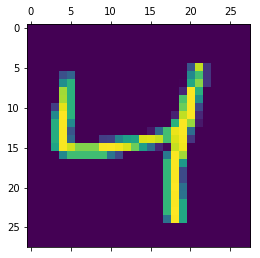

In [263]:
plt.matshow(x_train[2])

In [264]:
y_train[2]

4

In [265]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [266]:
x_test.shape

(10000, 28, 28)

In [267]:
x_train.shape

(60000, 28, 28)

In [268]:
import pandas as pd

In [269]:
#performing Scaling
x_train=x_train/255
x_test=x_test/255

In [270]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [271]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [272]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [273]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 793us/step - loss: 0.4662 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 1s 727us/step - loss: 0.3031 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 1s 722us/step - loss: 0.2831 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 1s 725us/step - loss: 0.2728 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 1s 724us/step - loss: 0.2671 - accuracy: 0.9254


In [274]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 577us/step - loss: 0.2672 - accuracy: 0.9263


[0.26717355847358704, 0.9262999892234802]

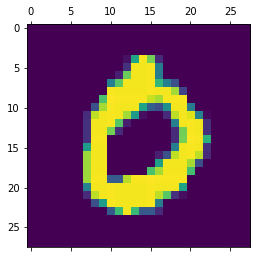

In [307]:
plt.matshow(x_test[3])

In [308]:
y_predicted=model.predict(x_test_flattened)
predicted[3]

array([9.9942350e-01, 2.4869149e-08, 1.1514282e-01, 1.1225373e-02,
       3.7679059e-05, 1.6537175e-01, 1.2997478e-01, 3.9862841e-02,
       3.7125856e-02, 2.8386325e-02], dtype=float32)

In [309]:
np.argmax(y_predicted[3]) 

0

In [291]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [292]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [293]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    6,    8,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   3,    9,  920,   22,    7,    5,   12,   11,   38,    5],
       [   1,    0,   16,  937,    0,   17,    2,   13,   17,    7],
       [   1,    1,    4,    2,  900,    0,   10,    6,    8,   50],
       [   8,    2,    4,   44,    7,  773,   14,    8,   26,    6],
       [   9,    3,    9,    1,    8,   12,  911,    2,    3,    0],
       [   1,    6,   22,    6,    3,    0,    0,  964,    2,   24],
       [   5,    7,    7,   29,    9,   27,    9,   13,  860,    8],
       [   9,    7,    2,   11,   15,    6,    0,   26,    5,  928]])>

Text(69.0, 0.5, 'Truth')

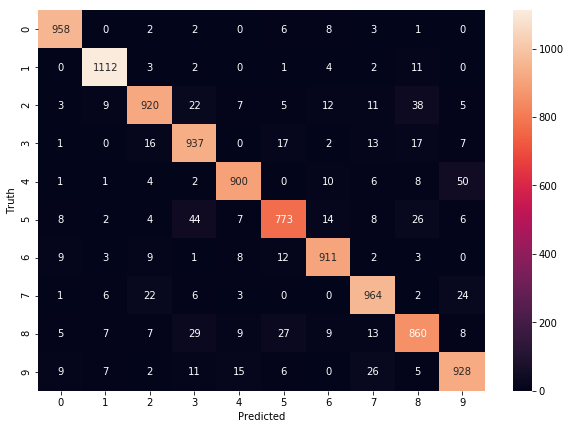

In [294]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Our Model With hidden Layers

In [296]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2710 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1220 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0856 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0655 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0501 - accuracy: 0.9846


In [310]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 814us/step - loss: 0.0873 - accuracy: 0.9734


[0.08733197301626205, 0.9733999967575073]

In [311]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [312]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [313]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    2,    2,    0,    4,    6],
       [   0, 1123,    3,    1,    0,    1,    1,    2,    4,    0],
       [   4,    2,  986,   14,    3,    0,    2,    8,   11,    2],
       [   0,    0,    0,  992,    0,    7,    0,    4,    4,    3],
       [   1,    0,    2,    1,  939,    0,    3,    7,    2,   27],
       [   2,    1,    0,    9,    0,  872,    1,    0,    6,    1],
       [   4,    3,    0,    0,    4,   13,  925,    2,    6,    1],
       [   0,    3,    9,    3,    0,    0,    0, 1008,    1,    4],
       [   3,    0,    2,   11,    1,    4,    0,    4,  942,    7],
       [   2,    3,    0,    6,    6,    2,    0,    7,    0,  983]])>

Text(69.0, 0.5, 'Truth')

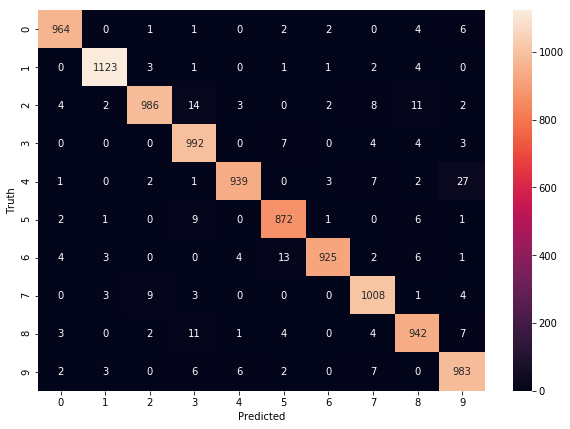

In [314]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#  Using Flatten layer so that we don't have to call .reshape on input dataset

In [315]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2747 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1226 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0871 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0663 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0532 - accuracy: 0.9841


In [316]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 827us/step - loss: 0.0807 - accuracy: 0.9754


[0.08072823286056519, 0.9753999710083008]